# Time Series EDA

- Time Series Train-Test Split
    1. Human-based
    2. Percentage Based
    3. Cross Validate Splits

- 10 Awesome Time Series Visualizations to Impress Your Friends and Family
    1. Blow off the time series
    2. y over time
    3. y averaged over various periods over time
    4. y.diff() over time
    5. Seasonal Plot
    6. Seasonal Subseries Plot
    7. Lag Plot
    8. Autocorrelation Plot
    9. Seasonal Decomposition
    10. Area Plots
    
- Aside: working with dates in matplotlib

- Aside: strftime

## Setup

We'll be looking at temperature data for san antonio from late 2012 to late 2017.

We'll need to convert from Kelvin to Fahrenheit.

°F = (K - 273.15) x 1.8000 + 32.00

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [67]:
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
df.head()

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [6]:
df.shape[0]

45252

In [4]:
df.temp.describe()

count    45252.000000
mean        69.144163
std         14.946638
min         17.420000
25%         59.810000
50%         71.661650
75%         79.412000
max        104.918000
Name: temp, dtype: float64

## Train-Test Split

- Ideally all splits contain a season
- Human-based: use the last year as test
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (sklearn.model_selection.TimeSeriesSplit)

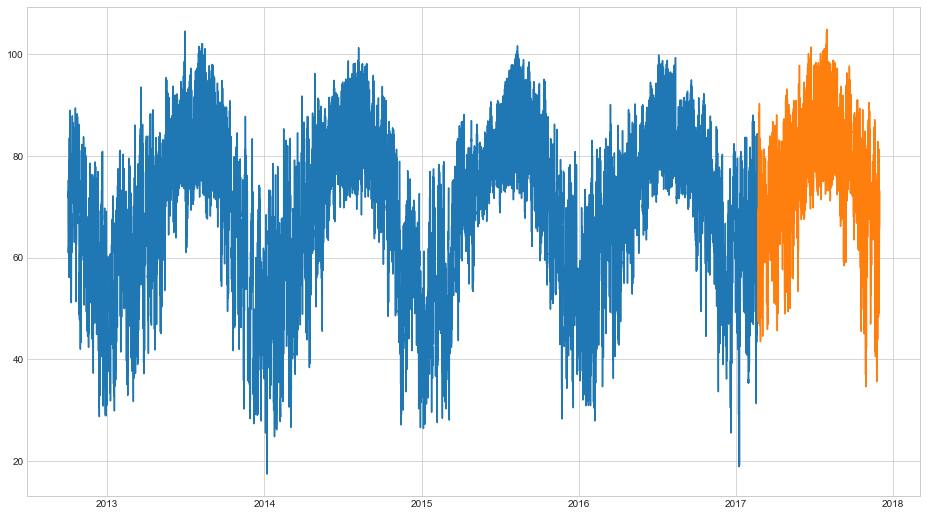

In [7]:
# Percentage Based Train/Test Split

train_size = .85
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

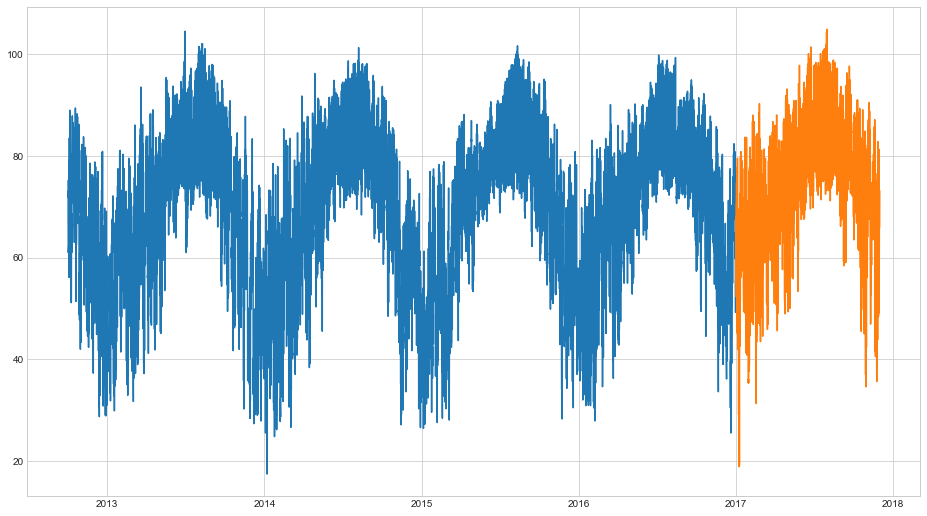

In [8]:
# Human Based or Domain Knowledge Based Train/Test Split
train = df[:'2016'] # This is up to, and including, 2016, which is different from the usual
test = df['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

## Visualizations

1. Blow off the time series
2. y over time
3. y averaged over various periods over time
4. y.diff() over time
5. Seasonal Plot
6. Seasonal Subseries Plot
7. Lag Plot
8. Autocorrelation Plot
9. Seasonal Decomposition
10. Area Plots

In [9]:
y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

### 1. Blow off the time series

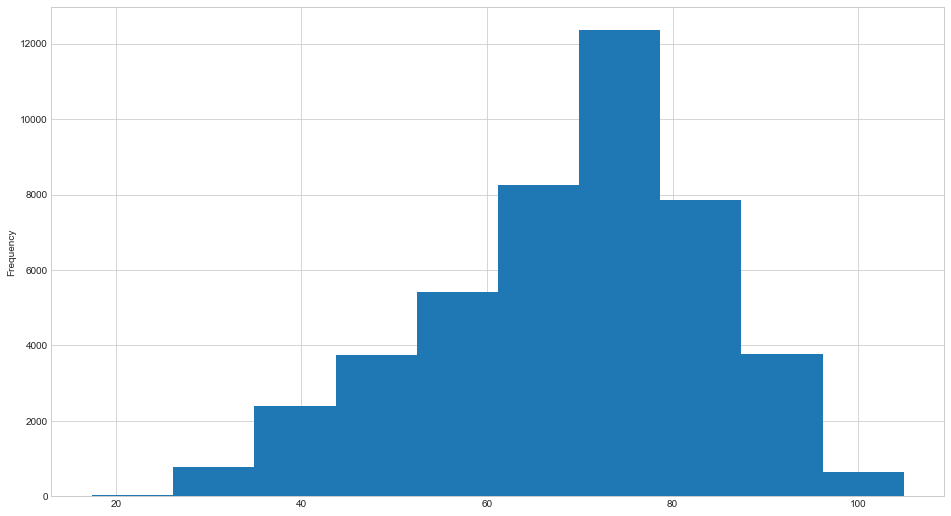

In [12]:
df.temp.plot.hist()

In [14]:
df['month'] = df.index.month
df.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,10
2012-10-01 14:00:00,61.076568,10
2012-10-01 15:00:00,61.139294,10
2012-10-01 16:00:00,61.202020,10
2012-10-01 17:00:00,61.264747,10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

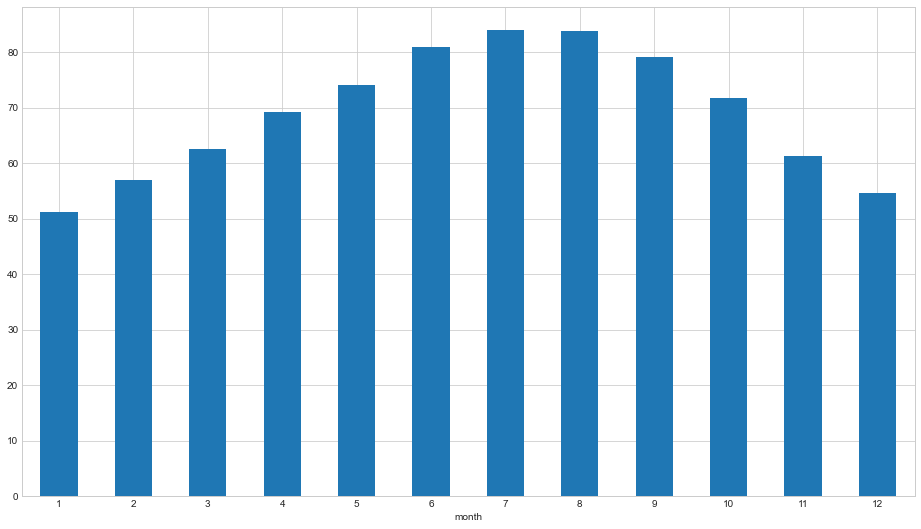

In [16]:
df.groupby('month').temp.mean().plot.bar()
plt.xticks(rotation=0)

In [18]:
df['weekday'] = df.index.day_name()
df.head()

,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10,Monday
2012-10-01 14:00:00,61.076568,10,Monday
2012-10-01 15:00:00,61.139294,10,Monday
2012-10-01 16:00:00,61.202020,10,Monday
2012-10-01 17:00:00,61.264747,10,Monday


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

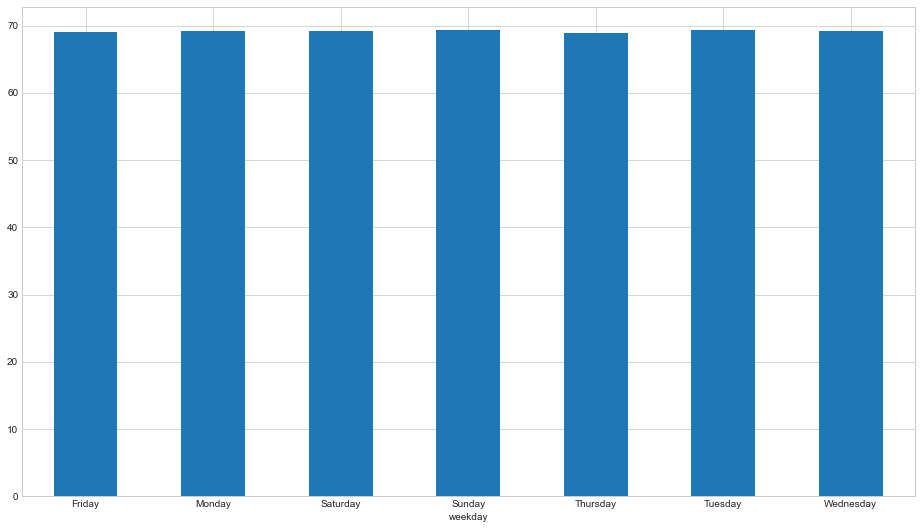

In [20]:
df.groupby('weekday').temp.mean().plot.bar()
plt.xticks(rotation=0)

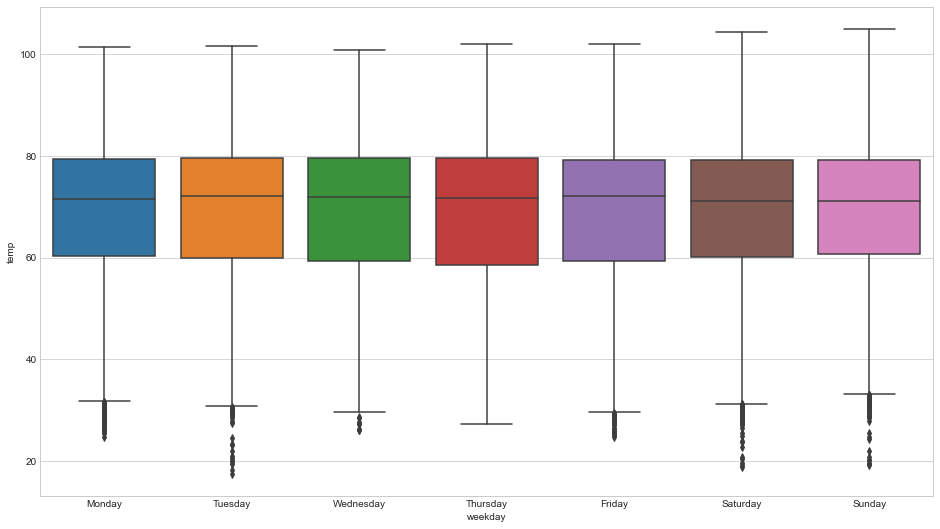

In [23]:
import seaborn as sns

sns.boxplot(data=df, y='temp', x='weekday')

### 2. y over time

In [24]:
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

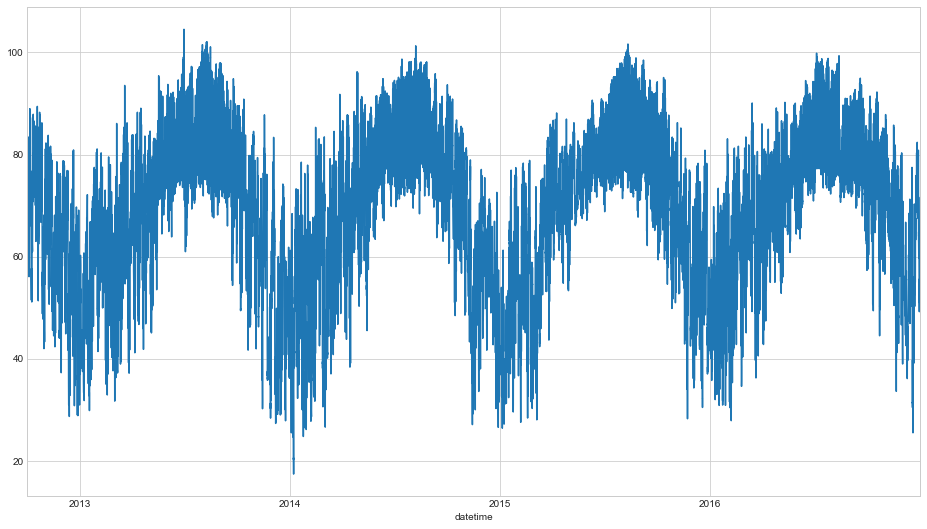

In [25]:
y.plot()

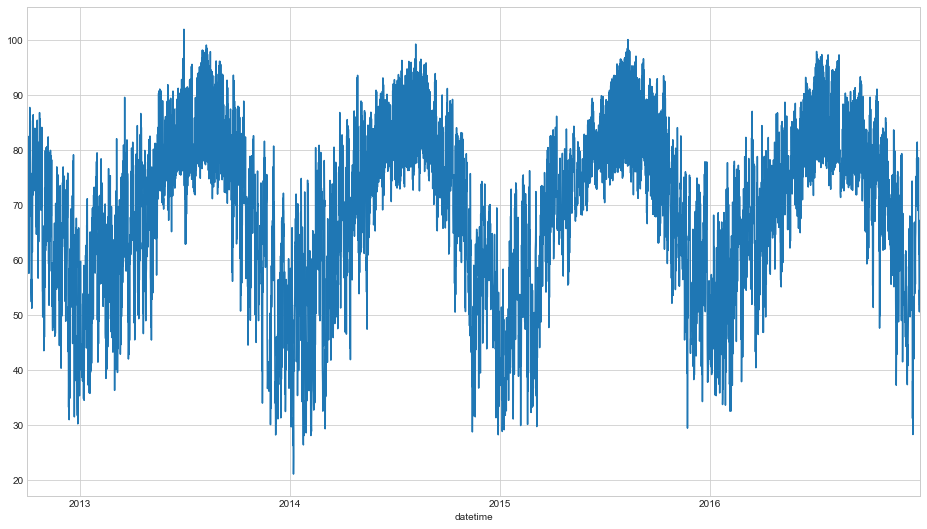

In [26]:
y.resample('6H').mean().plot()

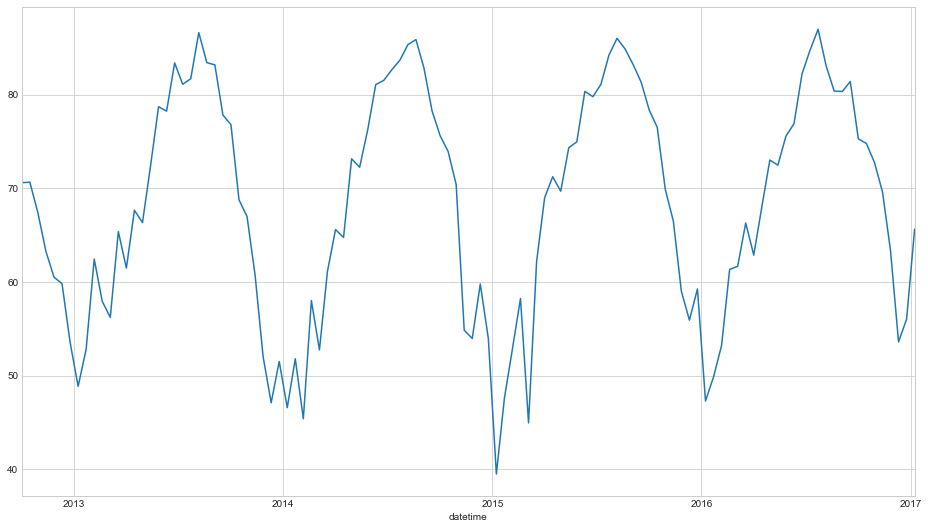

In [27]:
y.resample('2W').mean().plot()

### 3. y averaged over various periods over time

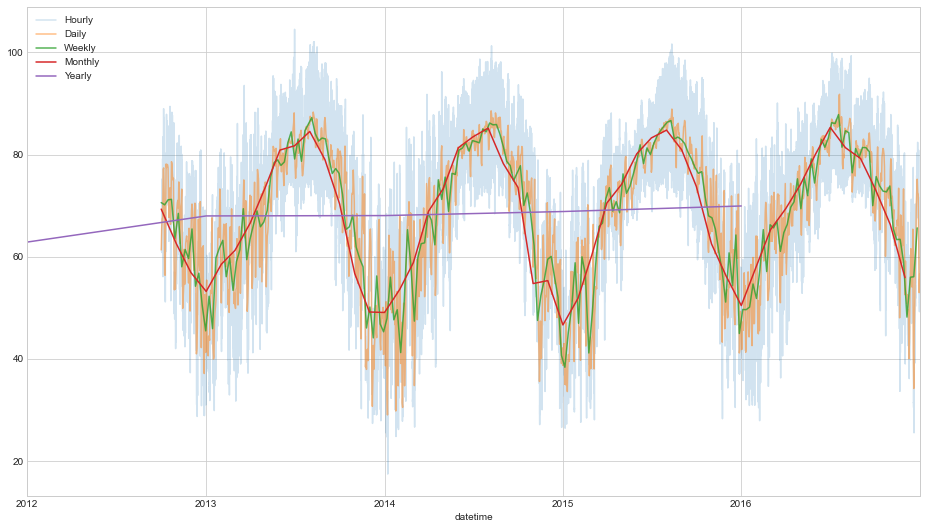

In [32]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

### 4. y.diff() over time

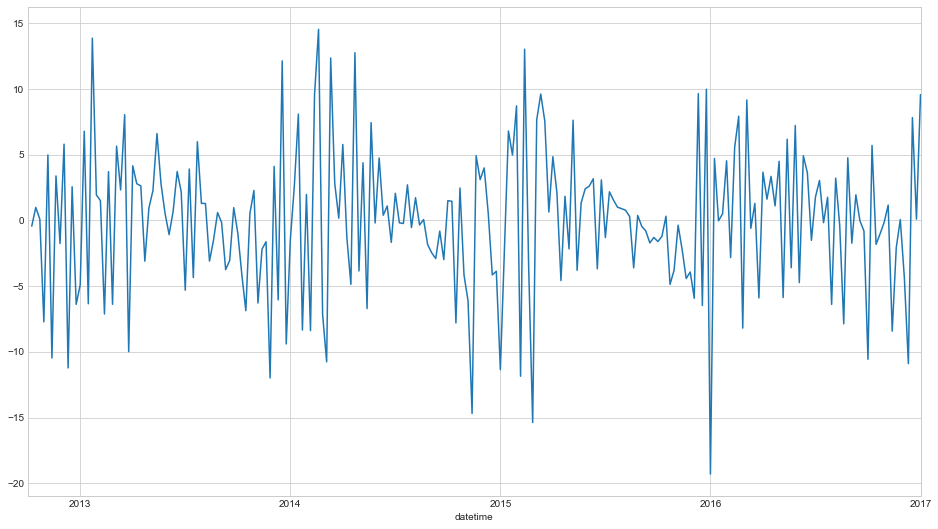

In [38]:
y.resample('W').mean().diff().plot()

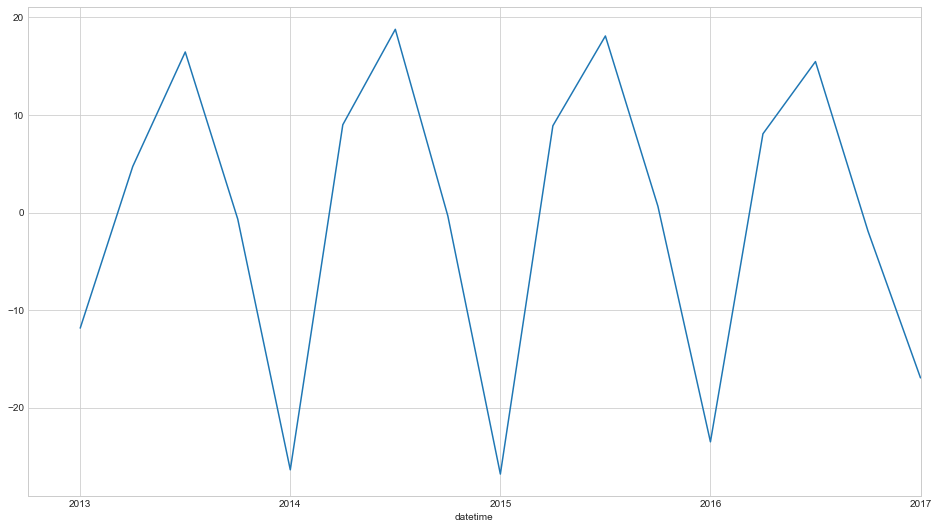

In [41]:
y.resample('3M').mean().diff().plot()

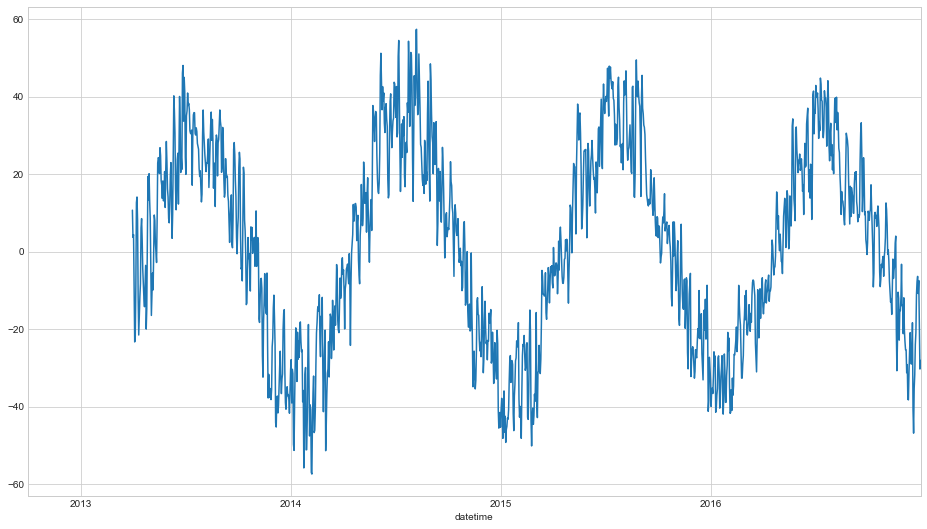

In [43]:
y.resample('D').mean().diff(182).plot()

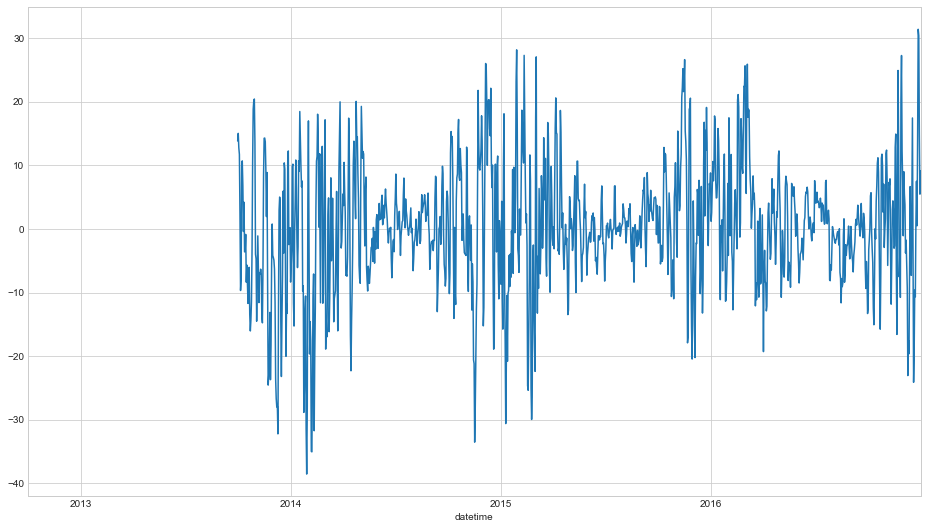

In [44]:
y.resample('D').mean().diff(365).plot()

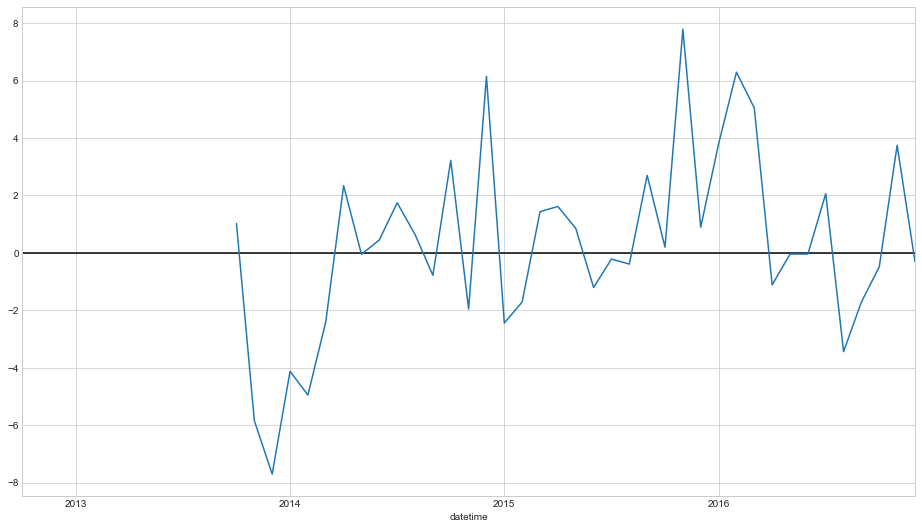

In [46]:
ax = y.resample('M').mean().diff(12).plot()
plt.hlines(0, *ax.get_xlim())

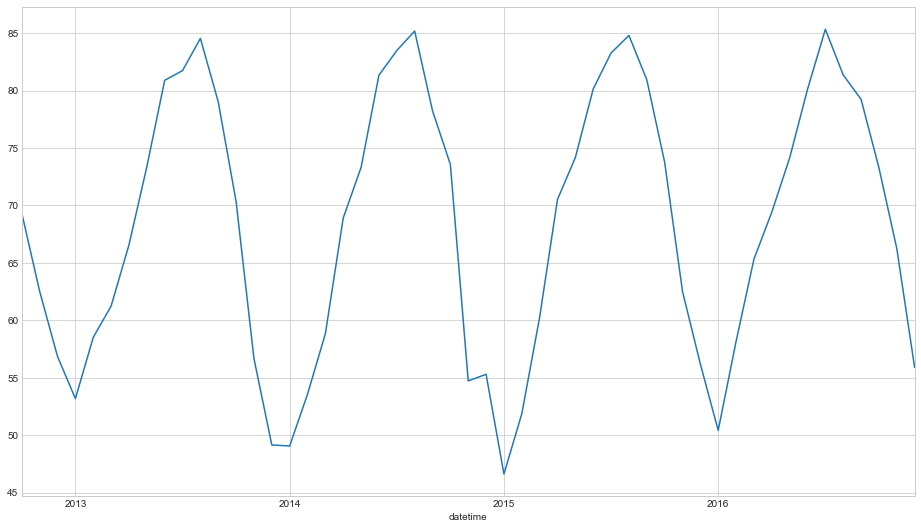

In [47]:
y.resample('M').mean().plot()

[Text(0.5, 1.0, 'Temperature over time')]

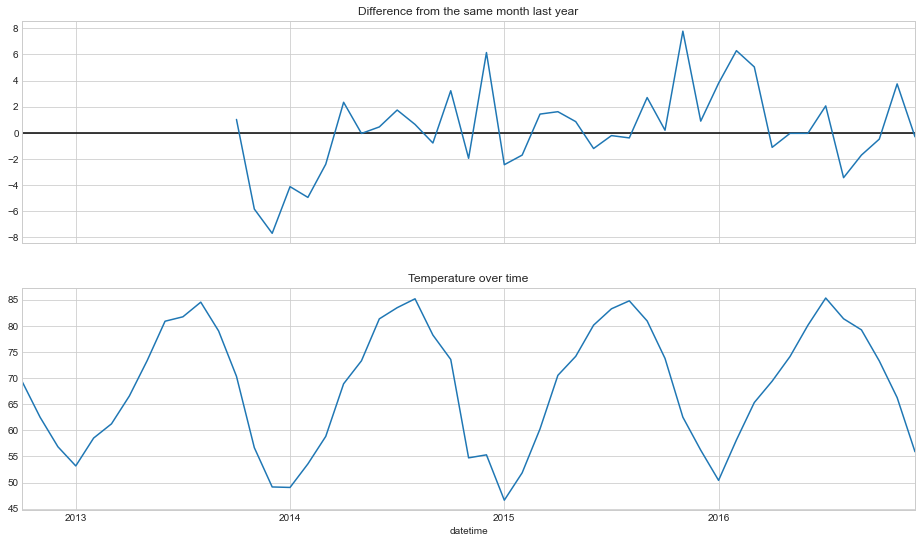

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 9))

ax = y.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim())
ax1.set(title='Difference from the same month last year')

y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Temperature over time')

[Text(0.5, 1.0, 'Temperature over time')]

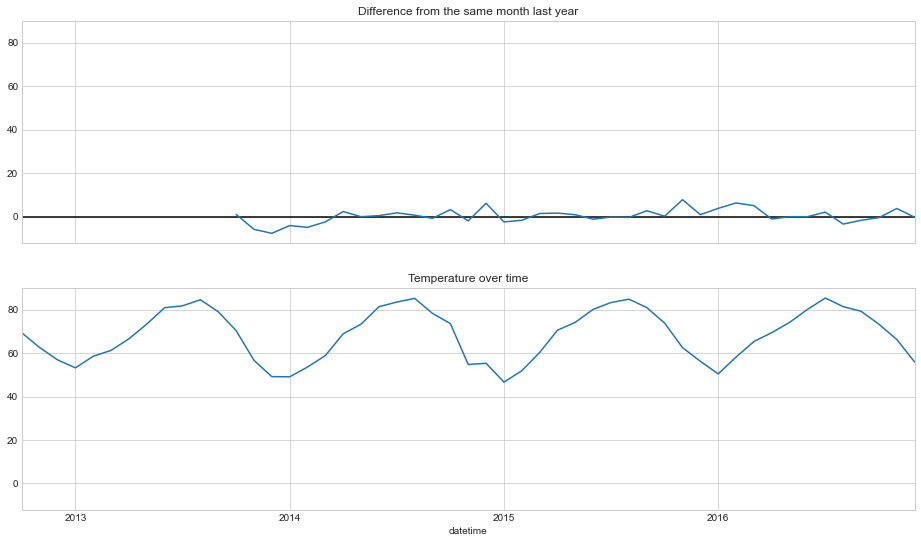

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(16, 9))

ax = y.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim())
ax1.set(title='Difference from the same month last year')

y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Temperature over time')

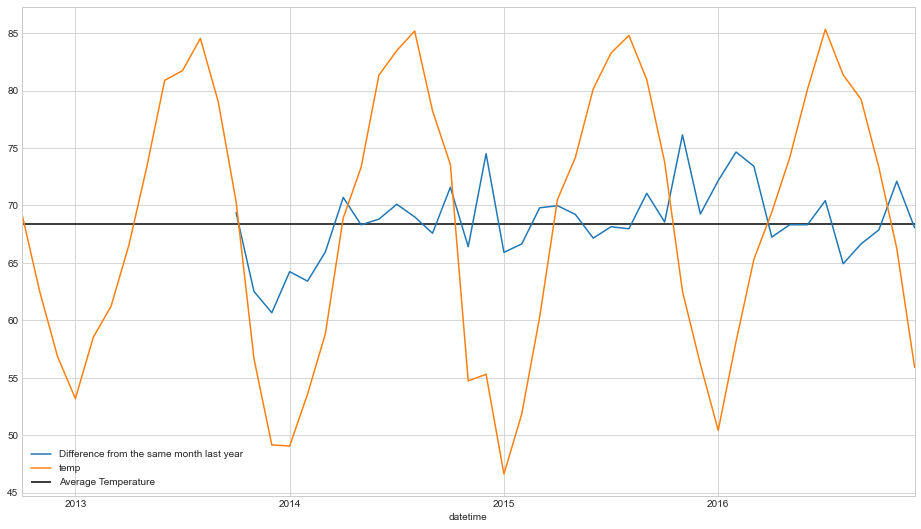

In [55]:
ax = (y.resample('M').mean().diff(12) + y.mean()).plot(label='Difference from the same month last year')
ax.hlines(y.mean(), *ax1.get_xlim(), label='Average Temperature')

y.resample('M').mean().plot(ax=ax)
ax.legend()

### 5. Seasonal Plot

- x_axis: month
- y_axis: year
- hue: year

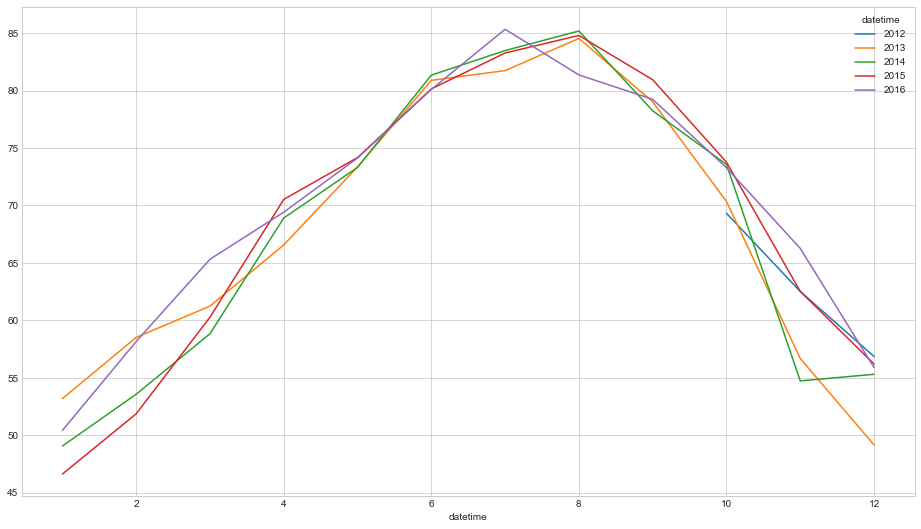

In [56]:
# unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

### 6. Seasonal Subseries Plot

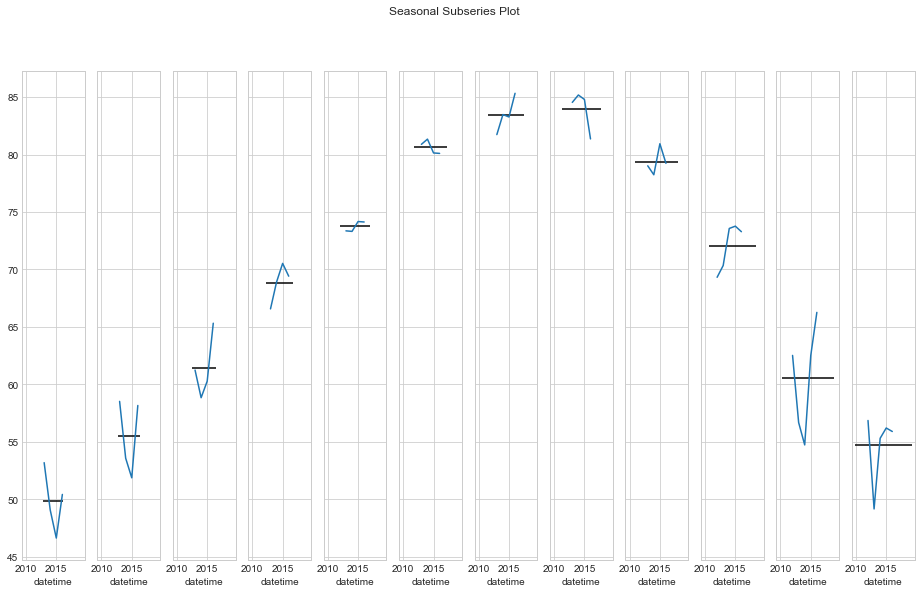

In [63]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax)
    ax.hlines(subset.mean(), *ax.get_xlim())
    
fig.suptitle('Seasonal Subseries Plot')
#fig.tight_layout()
fig.subplots_adjust()

plt.show()

### 7. Lag Plot

In [70]:
train['y(t + 1)'] = train.temp.shift(-1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
train.head()

,temp,y(t + 1)
datetime,,
2012-10-01 13:00:00,61.052000,61.076568
2012-10-01 14:00:00,61.076568,61.139294
2012-10-01 15:00:00,61.139294,61.202020
2012-10-01 16:00:00,61.202020,61.264747
2012-10-01 17:00:00,61.264747,61.327473


[Text(0, 0.5, 't + 1'), Text(0.5, 0, 't')]

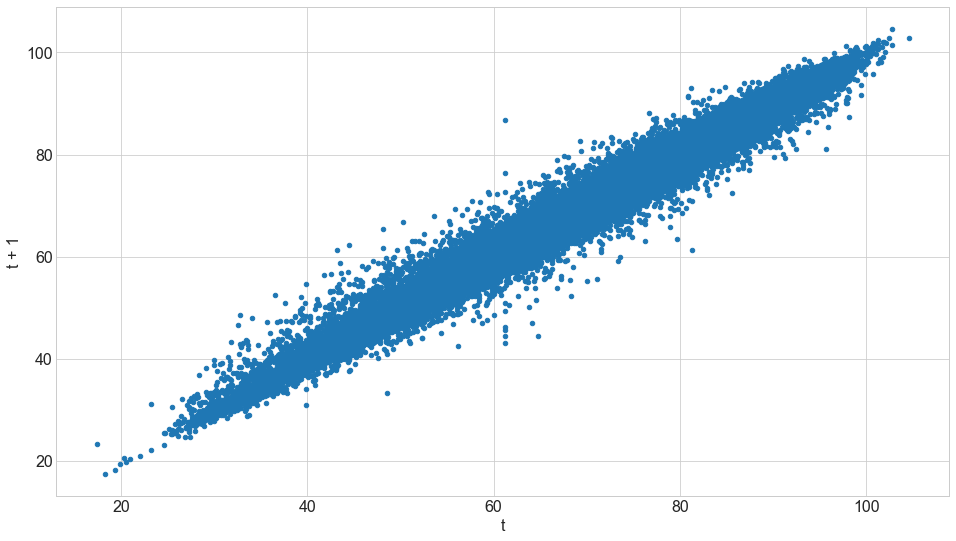

In [72]:
ax = train.plot.scatter(x='temp', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

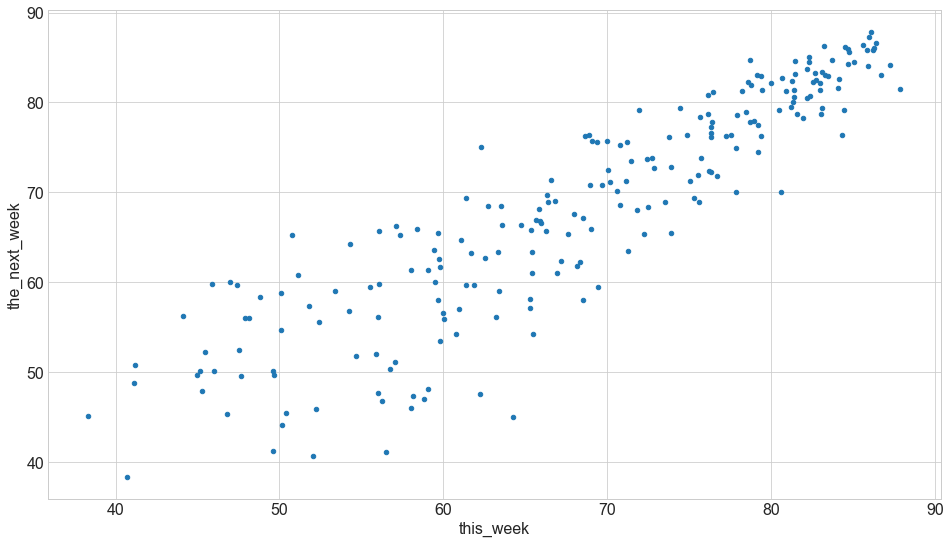

In [74]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})

weekly.plot.scatter(x='this_week', y='the_next_week')

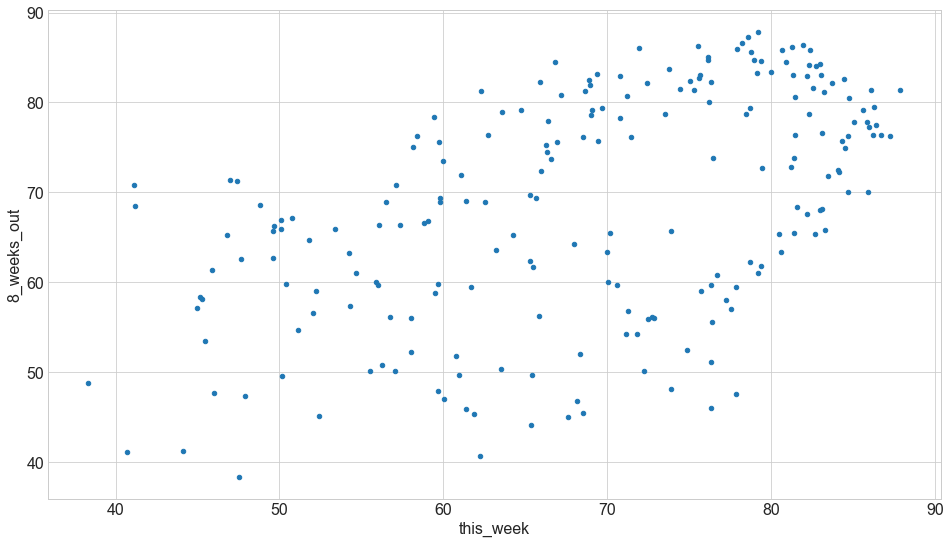

In [76]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['8_weeks_out'] = weekly.temp.shift(-8)
weekly = weekly.rename(columns={'temp': 'this_week'})

weekly.plot.scatter(x='this_week', y='8_weeks_out')

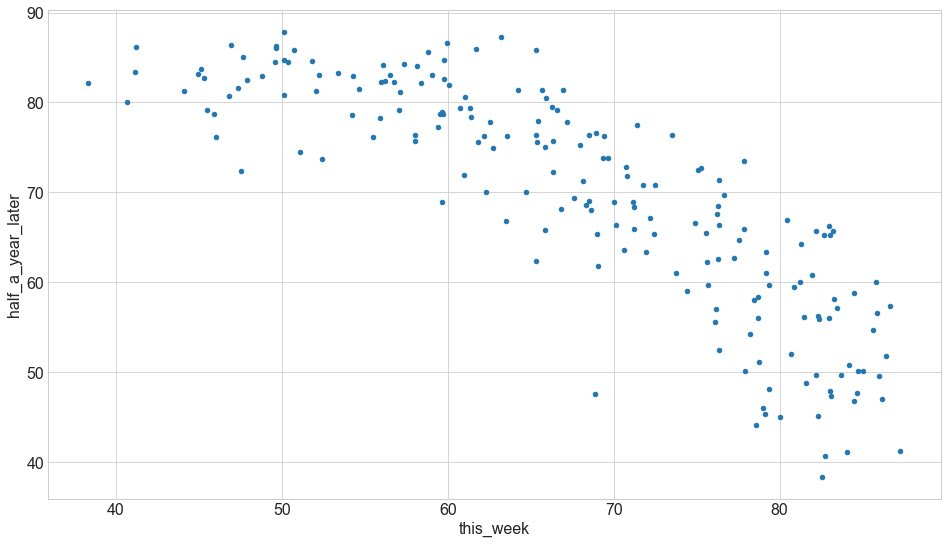

In [77]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['half_a_year_later'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})

weekly.plot.scatter(x='this_week', y='half_a_year_later')

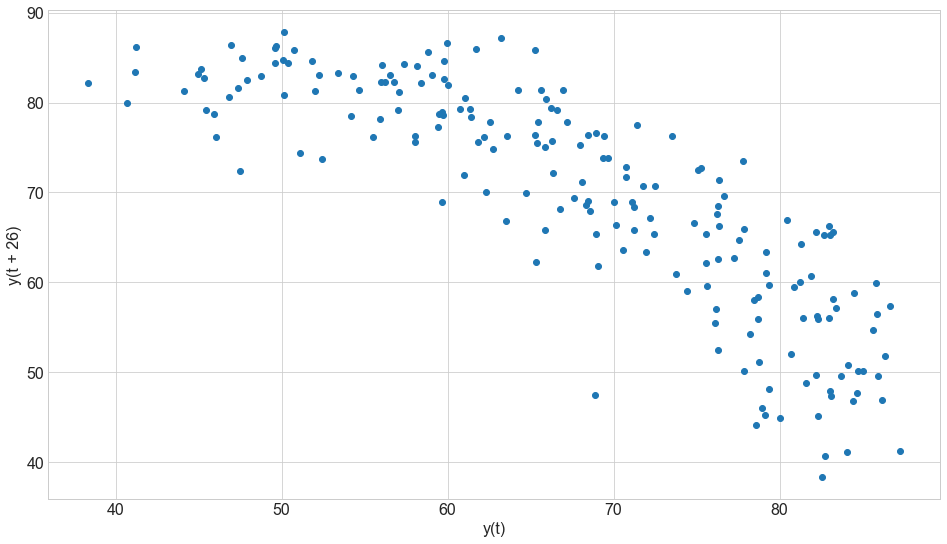

In [78]:
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

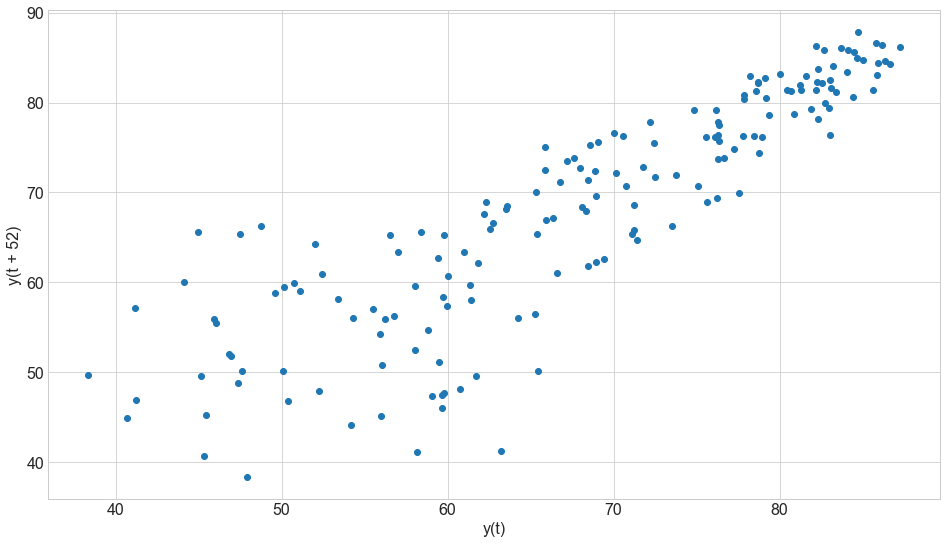

In [81]:
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=52)

8. Autocorrelation Plot

What is Pearson's R as a function of lag time?
- **autocorrection**: a series correlation with itself
- Can help us identify seasonality

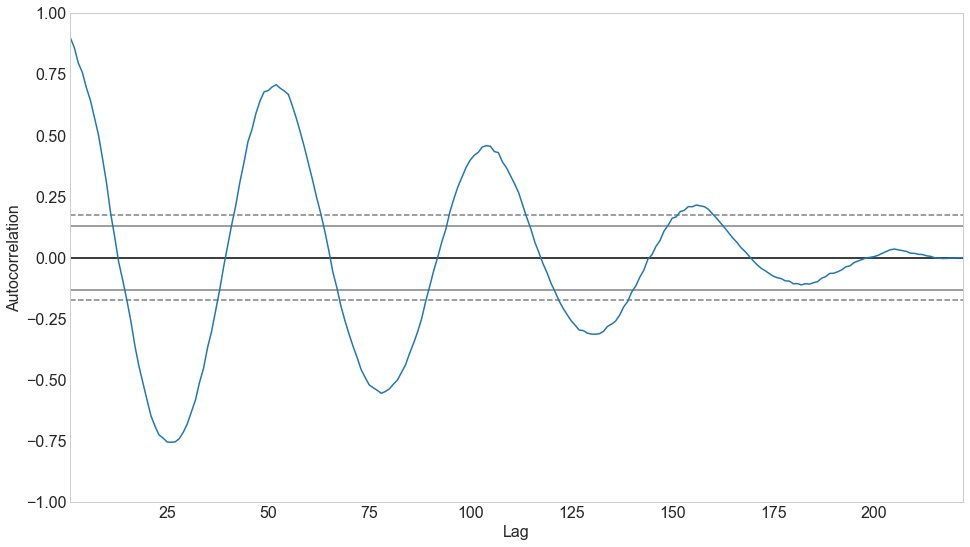

In [79]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())

### 9. Seasonal Decomposition

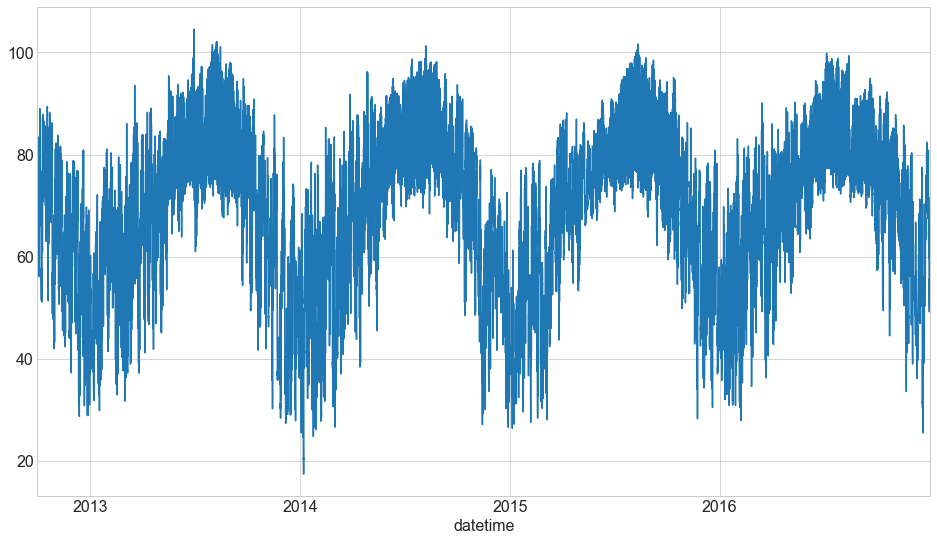

In [82]:
# a reminder of what the data looks like
train.temp.plot()

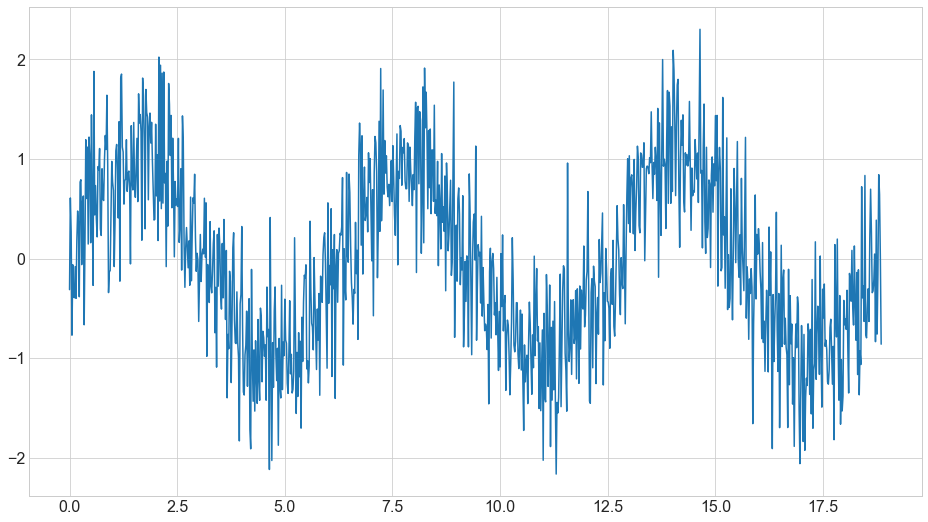

In [85]:
x = np.linspace(0, 6 * np.pi, 1000)
y = np.sin(x) + np.random.normal(0, .5, 1000)

plt.plot(x, y)

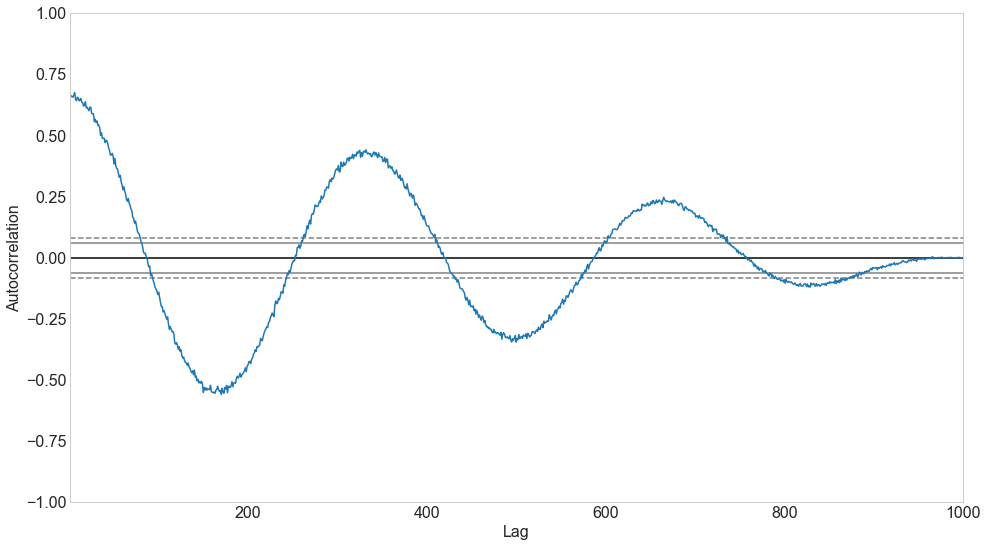

In [86]:
pd.plotting.autocorrelation_plot(y)

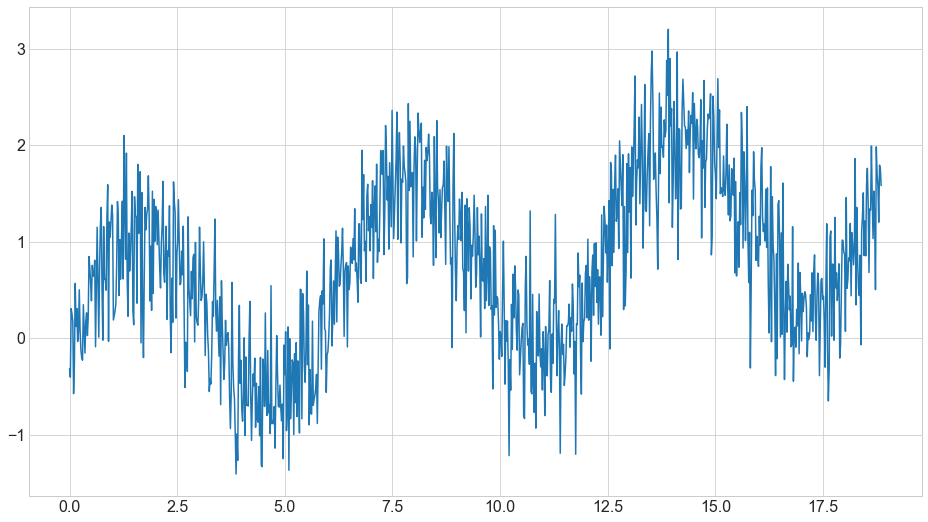

In [88]:
x = np.linspace(0, 6 * np.pi, 1000)
y = np.sin(x) + np.random.normal(0, .5, 1000) + np.linspace(0, 1.5, 1000)

plt.plot (x, y)

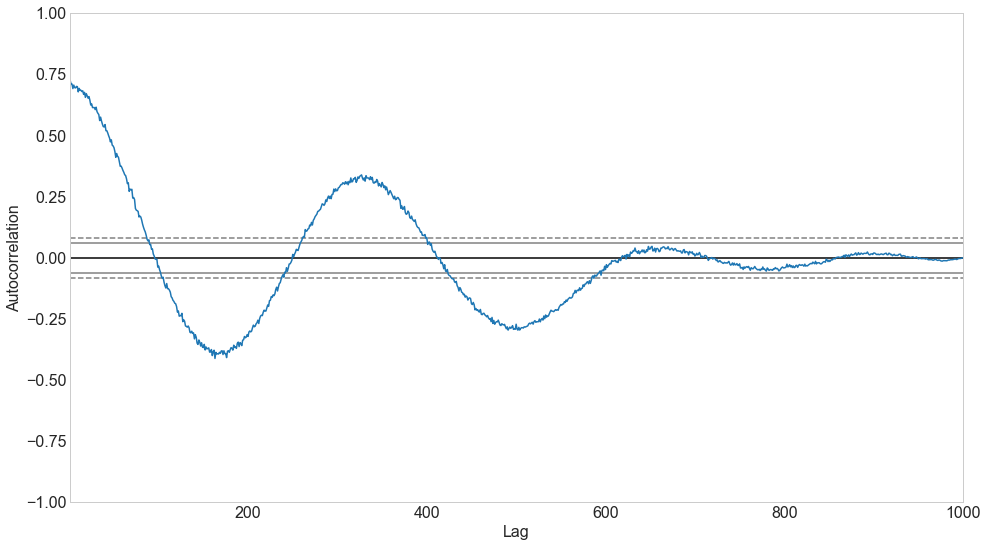

In [89]:
pd.plotting.autocorrelation_plot(y)

In [92]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomp = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

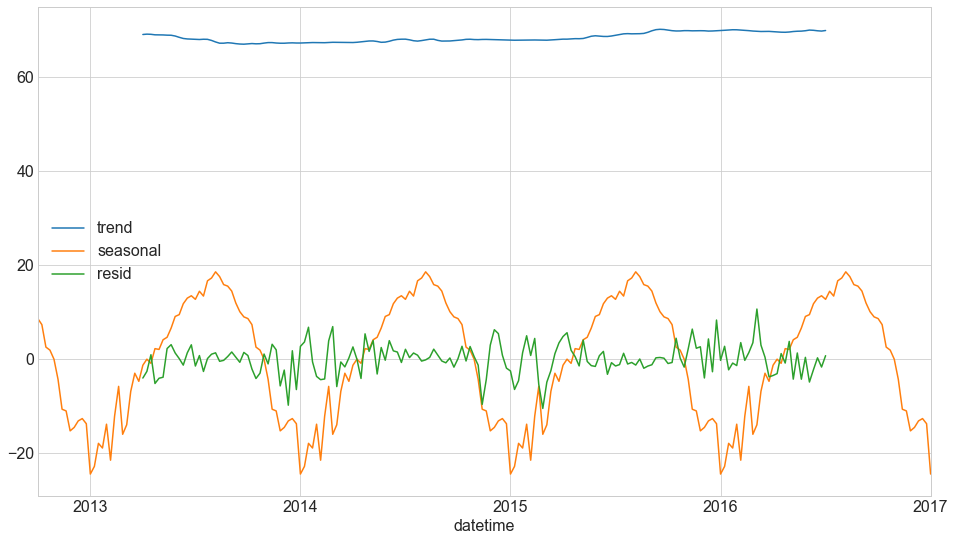

In [93]:
decomp.iloc[:, 1:].plot()

Additive seasonal decomposition model:
    


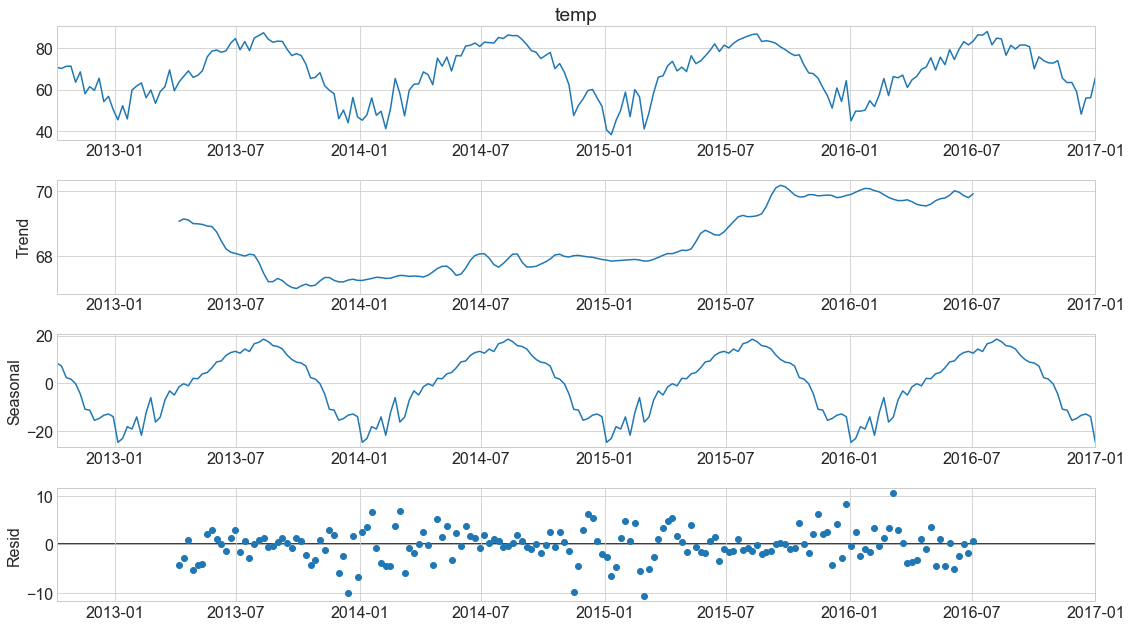

In [97]:
result.plot()
None

### 10. Area Plots

In [100]:
train = train.drop(columns='y(t + 1)')

KeyError: "['y(t + 1)'] not found in axis"

In [101]:
train.resample('D').mean()

,temp
datetime,
2012-10-01,61.330942
2012-10-02,65.678822
2012-10-03,67.411250
2012-10-04,67.703750
2012-10-05,77.073125
...,...
2016-12-27,72.533750
2016-12-28,72.269000
2016-12-29,64.256000


In [102]:
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])

In [103]:
train.groupby('temp_bin').mean()

,temp
temp_bin,
cold,47.241492
cool,65.109038
warm,75.061939
hot,86.041947


How is the distribution of temp_bin changing over time?

In [116]:
train.groupby('temp_bin').resample('M').size().unstack(0)

datetime    temp_bin
2012-10-31  cold        124
            cool        235
            warm        231
            hot         141
2012-11-30  cold        263
                       ... 
2016-11-30  hot          58
2016-12-31  cold        462
            cool        206
            warm         63
            hot          13
Length: 204, dtype: int64

In [115]:
train.head()

,temp,temp_bin
datetime,,
2012-10-01 13:00:00,61.052000,cool
2012-10-01 14:00:00,61.076568,cool
2012-10-01 15:00:00,61.139294,cool
2012-10-01 16:00:00,61.202020,cool
2012-10-01 17:00:00,61.264747,cool
